In [31]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [37]:
# data = pd.read_csv('~/Documents/Learning/data_analysis_workshop/marketing_campaign.csv', sep="\t")
data = pd.read_csv("~/Documents/Learning/data_analysis_workshop/Mall_Customers.csv")

In [38]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [39]:
data.rename(columns = {'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace = True)

In [40]:
data

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [43]:
data_to_predict = data[["Annual_Income", "Spending_Score"]]

<AxesSubplot:xlabel='Annual_Income', ylabel='Spending_Score'>

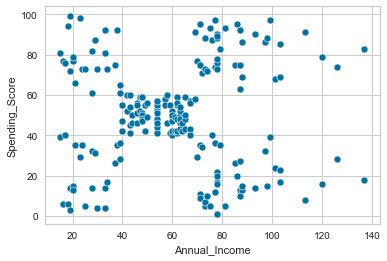

In [49]:
sns.scatterplot(data_to_predict["Annual_Income"], data_to_predict["Spending_Score"])

In [ ]:
data_to_predict = data[["Annual_Income", "Spending_Score"]]
x = data["Annual_Income"]
y = data["Spending_Score"]
#To plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.scatter(data_to_predict, x, y, c="maroon", marker="o")
# ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

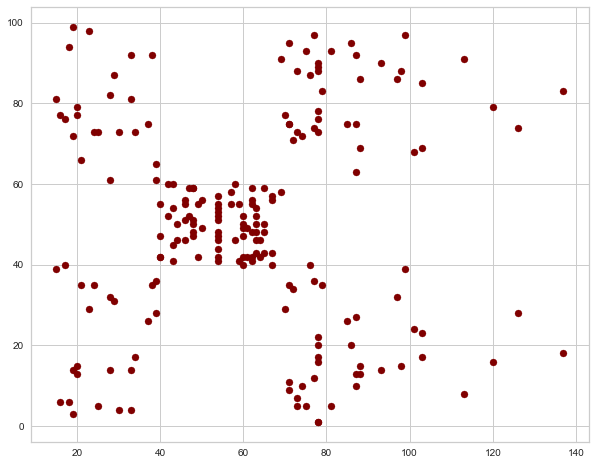

In [42]:
x = data["Annual_Income"]
y = data["Spending_Score"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(x,y, c="maroon", marker="o" )
# ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [44]:
data_to_predict.fillna(0, inplace=True)

In [45]:
data_to_predict.describe()

,Annual_Income,Spending_Score
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


In [11]:
data_to_predict.iloc[:, 0]

0       7
1       5
2       4
3       6
4       5
       ..
2235    5
2236    7
2237    6
2238    3
2239    7
Name: NumWebVisitsMonth, Length: 2240, dtype: int64

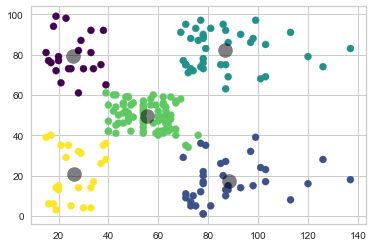

In [119]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_to_predict)
data_kmeans = kmeans.predict(data_to_predict)
plt.scatter(data_to_predict.iloc[:, 0], data_to_predict.iloc[:, 1], c= data_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

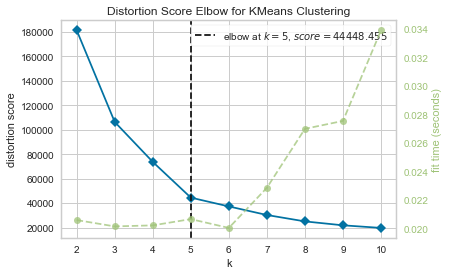

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_to_predict)
Elbow_M.show()

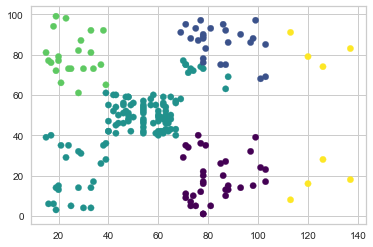

In [124]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(data_to_predict)
labels = gmm.predict(data_to_predict)
plt.scatter(data_to_predict.iloc[:, 0], data_to_predict.iloc[:, 1], c=labels, s=40, cmap='viridis');

In [54]:
Y = data_to_predict["NumWebPurchases"].to_list()
Y
Y = np.reshape(Y, (len(Y), 1))

KeyError: 'NumWebPurchases'

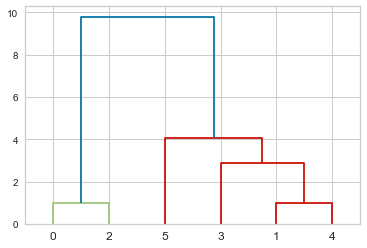

In [127]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
x = [[i] for i in [1, 7, 0, 4, 6, 9]]
lin = linkage(x, 'ward')
dn = dendrogram(lin)

In [131]:
[1, 7, 0, 4, 6, 9]

[1, 7, 0, 4, 6, 9]

In [130]:
list(enumerate())

[(0, 1), (1, 7), (2, 0), (3, 4), (4, 6), (5, 9)]

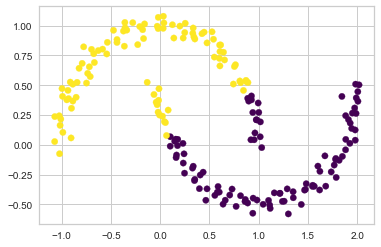

In [134]:
from sklearn.datasets import make_moons
data_moons, classes = make_moons(200, noise=.05, random_state=0)
gmm = GaussianMixture(n_components=2).fit(data_moons)
labels = gmm.predict(data_moons)
plt.scatter(data_moons[:, 0], data_moons[:, 1], c=labels, s=40, cmap='viridis')

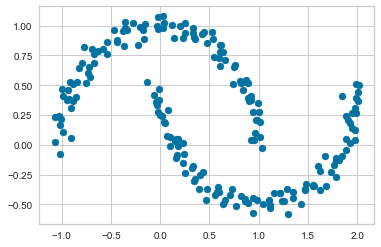

In [138]:
plt.scatter(data_moons[:, 0], data_moons[:, 1])


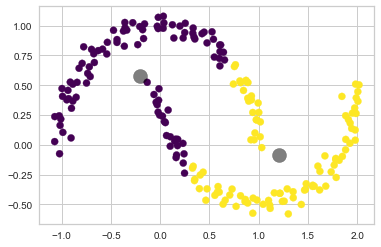

In [136]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_moons)
data_kmeans = kmeans.predict(data_moons)
plt.scatter(data_moons[:, 0], data_moons[:, 1], c= data_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

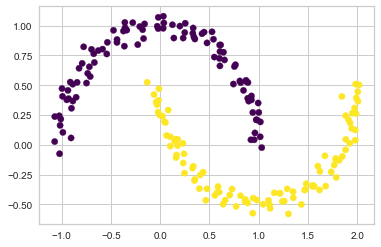

In [139]:
# predict moons with DBScan

from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(data_moons)
labels = db.labels_
plt.scatter(data_moons[:, 0], data_moons[:, 1], c=labels, s=40, cmap='viridis')